In [1]:
import numpy as np 
# This will be used to create arrays and perform numerical operations
import matplotlib.pyplot as plt
# This will be used for plotting the results

In [4]:
# Those are the results from the scientist 
qsat = 4.72 #mmol/s
k_263 = 6.75*10**-6 #1/Pa
k_303 = 1.48*10**-6 #1/Pa
k_343 = 5.16*10**-7 #1/Pa

[0.0038022813688212928, 0.0033003300330033004, 0.0029154518950437317]
[-11.905968053079835, -13.42346847018825, -14.477159071464849]
[2905.4431452   -22.97116964]
1.0562039350936559e-10 1/Pa
-24155.854309230108 J/mol


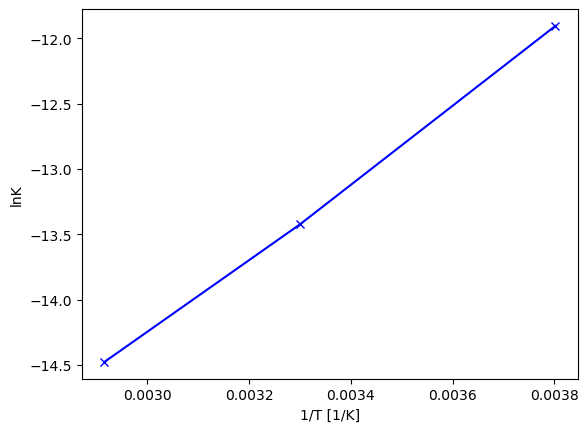

In [5]:
#Now the goal is to group everything in arrays 
T = [263, 303, 343]
K_T = [k_263, k_303, k_343]

#Then we plot lnk vs 1/T
T_inv = []
for i in T:
    T_inv.append(1/i)
    
print(T_inv)

K_log = []
for j in K_T:
    K_log.append(np.log(j))

print(K_log)

plt.plot(T_inv, K_log, color ="blue", marker = "x",markerfacecolor="red")
plt.xlabel("1/T [1/K]")
plt.ylabel("lnK")

#To identify the unknows we do a linear fitting that will allow to find those values and we print the results

Slope_Intercept = np.polyfit(T_inv, K_log,1)
K_0 = np.exp(Slope_Intercept[1])
H = Slope_Intercept[0]*-8.314

print(Slope_Intercept)
print(f"{K_0} 1/Pa")
print(f"{H} J/mol")